In [1]:
import pandas as pd # Manipulate DataFrame
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
import numpy as np # Data analysis Library
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline
%config IPCompleter.greedy=True



LOADING DATA

In [1]:
#Loadind the Data
SurveyData = pd.read_csv('EDUDATA5.csv', encoding='latin')
#survey.dropna(inplace = True) # Drops any NAN's
print(SurveyData.shape)
SurveyData.head()

NameError: name 'pd' is not defined

In [3]:
SurveyData.tail()



,SSEG,SSMG,SSPG,SSCG,SSBG,MTH101,GST101,MTH103,PHY101,STA101,CSC102,MTH102,PHY103,DEPARTMENT,FGRADE
1887,C6,C6,C5,C6,C4,E,D,E,E,E,E,C,D,STATISTICS,PASS
1888,C6,B3,B3,B3,B2,E,C,E,F,C,E,F,F,STATISTICS,PASS
1889,C6,C5,C5,C5,C4,D,E,E,E,D,D,E,E,STATISTICS,THIRD CLASS
1890,D7,C6,B3,B3,C5,D,E,D,E,D,D,NaN,F,STATISTICS,THIRD CLASS
1891,C6,C6,NaN,C6,C5,F,D,F,C,E,F,F,E,STATISTICS,NOT GRADUATE


In [4]:
SurveyData.dropna(inplace = True) # Drops any NAN's
print(SurveyData.shape)
#survey.head()






(1866, 15)


In [5]:
SurveyData.columns



Index(['SSEG', 'SSMG', 'SSPG', 'SSCG', 'SSBG', 'MTH101', 'GST101', 'MTH103',
       'PHY101', 'STA101', 'CSC102', 'MTH102', 'PHY103', 'DEPARTMENT',
       'FGRADE'],
      dtype='object')

In [6]:
print('Survey Data Shape:', SurveyData.shape)



Survey Data Shape: (1866, 15)


In [7]:
df_train = pd.DataFrame()
df_train = SurveyData
#df_train = pd.DataFrame()
df_train.sort_index(inplace=True) # sort the dataframe index



In [8]:
df_train.columns



Index(['SSEG', 'SSMG', 'SSPG', 'SSCG', 'SSBG', 'MTH101', 'GST101', 'MTH103',
       'PHY101', 'STA101', 'CSC102', 'MTH102', 'PHY103', 'DEPARTMENT',
       'FGRADE'],
      dtype='object')

In [9]:
df_train.rename(columns={
    'GST101 ': 'GST101',
    ' STA101': 'STA101',
    ' CSC102 ': 'CSC102',
    ' PHY101': 'PHY101'
}, inplace=True)



# DATA CLEANING

In [10]:
# ENG
df_train['SSEG'].unique()



array(['B3', 'C6', 'C5', 'D7', 'C4', 'A1', 'E8', 'F9', 'B2', 'A2'], dtype=object)

In [11]:
# correct grade 'c' to 'C'
df_train['SSEG'][df_train['SSEG'] == 'B'] = 'B3'
df_train['SSEG'][df_train['SSEG'] == 'CC4'] = 'C4'
df_train['SSEG'][df_train['SSEG'] == 'B 2'] = 'B2'
df_train['SSEG'][df_train['SSEG'] == 'C'] = 'C6'
df_train['SSEG'][df_train['SSEG'] == 'A'] = 'A1'
df_train['SSEG'][df_train['SSEG'] == 'A2'] = 'A1'


In [12]:
# MATHS
df_train['SSMG'].unique()


array(['B3', 'C6', 'C4', 'C5', 'A1', 'B2', 'D7', 'E8', 'F9', 'C 4', 'B',
       ' B2', 'C 6', 'A3', ' B3'], dtype=object)

In [13]:
df_train['SSMG'][df_train['SSMG'] == 'C 6'] = 'C6'
df_train['SSMG'][df_train['SSMG'] == 'A3'] = 'B3'
df_train['SSMG'][df_train['SSMG'] == 'C 4'] = 'C4'
df_train['SSMG'][df_train['SSMG'] == 'C'] = 'C6'
df_train['SSMG'][df_train['SSMG'] == 'A'] = 'A1'
df_train['SSMG'][df_train['SSMG'] == 'A3'] = 'B3'
df_train['SSMG'][df_train['SSMG'] == ' B3'] = 'B3'
df_train['SSMG'][df_train['SSMG'] == 'B'] = 'B3'



In [14]:
# PHYSIC
df_train['SSPG'].unique() # already cleaned



array(['C5', 'C6', 'A1', 'B2', 'C4', 'B3', 'F9', 'E8', 'D7', 'B3 ', 'B',
       'C2', 'C7', '  B3', 'P7'], dtype=object)

In [15]:
df_train['SSPG'][df_train['SSPG'] == 'C 5'] = 'C5'
df_train['SSPG'][df_train['SSPG'] == 'C7'] = 'C6'
df_train['SSPG'][df_train['SSPG'] == 'P7'] = 'D7'
df_train['SSPG'][df_train['SSPG'] == 'C'] = 'C6'
df_train['SSPG'][df_train['SSPG'] == 'F'] = 'F9'
df_train['SSPG'][df_train['SSPG'] == 'B'] = 'B3'
df_train['SSPG'][df_train['SSPG'] == 'B3 '] = 'B3'
df_train['SSPG'][df_train['SSPG'] == 'C2'] = 'C4'
df_train['SSPG'][df_train['SSPG'] == '  B3'] = 'B3'



In [16]:
# CHEM
df_train['SSCG'].unique() # already cleaned


array(['C6', 'C5', 'D7', 'C4', 'B3', 'F9', 'B2', 'E8', 'A1', ' C5', 'P8',
       'C 4', 'AI', 'C8'], dtype=object)

In [17]:
df_train['SSCG'][df_train['SSCG'] == 'C 4'] = 'C4'
df_train['SSCG'][df_train['SSCG'] == 'C'] = 'C6'
df_train['SSCG'][df_train['SSCG'] == 'C8'] = 'C6'
df_train['SSCG'][df_train['SSCG'] == 'A'] = 'A1'
df_train['SSCG'][df_train['SSCG'] == 'B'] = 'B3'
df_train['SSCG'][df_train['SSCG'] == 'P8'] = 'E8'
df_train['SSCG'][df_train['SSCG'] == 'AI'] = 'A1'
df_train['SSCG'][df_train['SSCG'] == ' C5'] = 'C5'



In [18]:
# BIO
df_train['SSBG'].unique() # already cleaned


array(['C5', 'C6', 'B3', 'B2', 'C4', 'D7', 'F9', 'E8', 'B6', 'A1', 'A2',
       'C 5', 'AI'], dtype=object)

In [19]:
df_train['SSBG'][df_train['SSBG'] == 'C 5'] = 'C5'
df_train['SSBG'][df_train['SSBG'] == 'C'] = 'C6'
df_train['SSBG'][df_train['SSBG'] == 'C 6'] = 'C6'
df_train['SSBG'][df_train['SSBG'] == 'B'] = 'B3'
df_train['SSBG'][df_train['SSBG'] == 'A2'] = 'B2'
df_train['SSBG'][df_train['SSBG'] == 'B6'] = 'C6'
df_train['SSBG'][df_train['SSBG'] == 'A'] = 'A1'
df_train['SSBG'][df_train['SSBG'] == 'F'] = 'F9'
df_train['SSBG'][df_train['SSBG'] == 'AI'] = 'A1'




In [20]:
# MTH101
df_train['MTH101'].unique() # already cleaned



array(['E', 'C', 'A', 'B', 'D', 'F', 'C '], dtype=object)

In [21]:
df_train['MTH101'][df_train['MTH101'] == 'C '] = 'C'
df_train['MTH101'][df_train['MTH101'] == ' B'] = 'B'
df_train['MTH101'][df_train['MTH101'] == ' C'] = 'C'
df_train['MTH101'][df_train['MTH101'] == ' E'] = 'E'
df_train['MTH101'][df_train['MTH101'] == '--'] = 'F'



In [22]:
# STA101
df_train['STA101'].unique() # already cleaned



array(['D', 'C', 'A', 'B', 'E', 'F'], dtype=object)

In [23]:
df_train['STA101'][df_train['STA101'] == '--'] = 'F'

In [24]:
#GST101
df_train['GST101'].unique() # already cleaned


array(['C', 'A', 'B', 'E', 'D', 'F', 'C '], dtype=object)

In [25]:
df_train['GST101'][df_train['GST101'] == 'C '] = 'C'

In [26]:
#MTH103
df_train['MTH103'].unique() # already cleaned


array(['E', 'C', 'B', 'F', 'D', 'A'], dtype=object)

In [27]:
df_train['MTH103'][df_train['MTH103'] == ' B'] = 'B'
df_train['MTH103'][df_train['MTH103'] == '--'] = 'F'


In [28]:
#CSC102
df_train['CSC102'].unique() # already cleaned


array(['D', 'C', 'A', 'E', 'F', 'B'], dtype=object)

In [29]:
df_train['CSC102'][df_train['CSC102'] == '--'] = 'F'

In [30]:
#MTH102
df_train['MTH102'].unique() # already cleaned


array(['E', 'C', 'B', 'D', 'F', 'A'], dtype=object)

In [31]:
#PHY101
df_train['PHY101'].unique() # already cleaned


array(['B', 'C', 'A', 'E', 'D', 'F'], dtype=object)

In [32]:
#PHY103
df_train['PHY103'].unique() # already cleaned


array(['E', 'C', 'A', 'B', 'D', 'F'], dtype=object)

In [33]:
df_train['PHY103'][df_train['PHY103'] == '--'] = 'F'

In [34]:
# GRADE
df_train['FGRADE'].unique()



array(['PASS', 'SECOND CLASS LOWER', 'SECOND CLASS UPPER', 'THIRD CLASS',
       'NOT GRADUATE', 'FIRST CLASS'], dtype=object)

In [35]:
# fix second class lower
df_train['FGRADE'][df_train['FGRADE'] == ' \xa0\xa0SECOND CLASS LOWER'] = 'SECOND CLASS LOWER'



In [36]:
# fix second class upper
df_train['FGRADE'][df_train['FGRADE'] == ' \xa0\xa0 \xa0\xa0SECOND CLASS UPPER'] = 'SECOND CLASS UPPER'



In [37]:
# fix third class
df_train['FGRADE'][df_train['FGRADE'] == ' \xa0\xa0 \xa0\xa0THIRD CLASS'] = 'THIRD CLASS'



In [38]:
# fix pass
df_train['FGRADE'][df_train['FGRADE'] == 'PASS'] = 'PASS'



In [39]:
# fix first class
df_train['FGRADE'][df_train['FGRADE'] == ' \xa0\xa0FIRST CLASS'] = 'FIRST CLASS'



In [40]:
# fix Not graduate
df_train['FGRADE'][df_train['FGRADE'] == ' \xa0\xa0NOT GRADUATE'] = 'NOT GRADUATE'



In [41]:
# drop Nan's
df_train.dropna(inplace=True)





In [42]:
df_train.head()



,SSEG,SSMG,SSPG,SSCG,SSBG,MTH101,GST101,MTH103,PHY101,STA101,CSC102,MTH102,PHY103,DEPARTMENT,FGRADE
0,B3,B3,C5,C6,C5,E,C,E,B,D,D,E,E,COMPUTER SCIENCE,PASS
1,C6,C6,C6,C6,C6,C,A,C,C,C,C,C,C,COMPUTER SCIENCE,SECOND CLASS LOWER
2,C5,C4,C6,C5,B3,A,A,B,A,A,A,B,A,COMPUTER SCIENCE,SECOND CLASS UPPER
3,D7,C6,C6,C6,B3,C,A,C,A,A,C,C,E,COMPUTER SCIENCE,SECOND CLASS LOWER
4,C6,C6,C6,C5,B2,C,B,C,A,A,C,B,B,COMPUTER SCIENCE,SECOND CLASS LOWER


In [43]:
df_train.tail()



,SSEG,SSMG,SSPG,SSCG,SSBG,MTH101,GST101,MTH103,PHY101,STA101,CSC102,MTH102,PHY103,DEPARTMENT,FGRADE
1885,C5,C6,C5,C4,C6,E,E,D,E,E,D,F,E,STATISTICS,THIRD CLASS
1886,E8,C6,B3,C6,C6,D,E,D,C,D,C,E,F,STATISTICS,THIRD CLASS
1887,C6,C6,C5,C6,C4,E,D,E,E,E,E,C,D,STATISTICS,PASS
1888,C6,B3,B3,B3,B2,E,C,E,F,C,E,F,F,STATISTICS,PASS
1889,C6,C5,C5,C5,C4,D,E,E,E,D,D,E,E,STATISTICS,THIRD CLASS


In [44]:
# view random row
df_train.iloc[1410]



SSEG                          C6
SSMG                          B3
SSPG                          B3
SSCG                          A1
SSBG                          C6
MTH101                         A
GST101                         C
MTH103                         C
PHY101                         A
STA101                         B
CSC102                         B
MTH102                         B
PHY103                         C
DEPARTMENT            STATISTICS
FGRADE        SECOND CLASS UPPER
Name: 1428, dtype: object

# FREQUENCY DISTRIBUTION

In [45]:
categorical = ['SSEG', 'SSMG', 'SSPG', 'SSCG', 'SSBG', 'MTH101', 'GST101',
       'MTH103', 'STA101', 'CSC102', 'MTH102', 'PHY101', 'PHY103', 'DEPARTMENT', 'FGRADE']



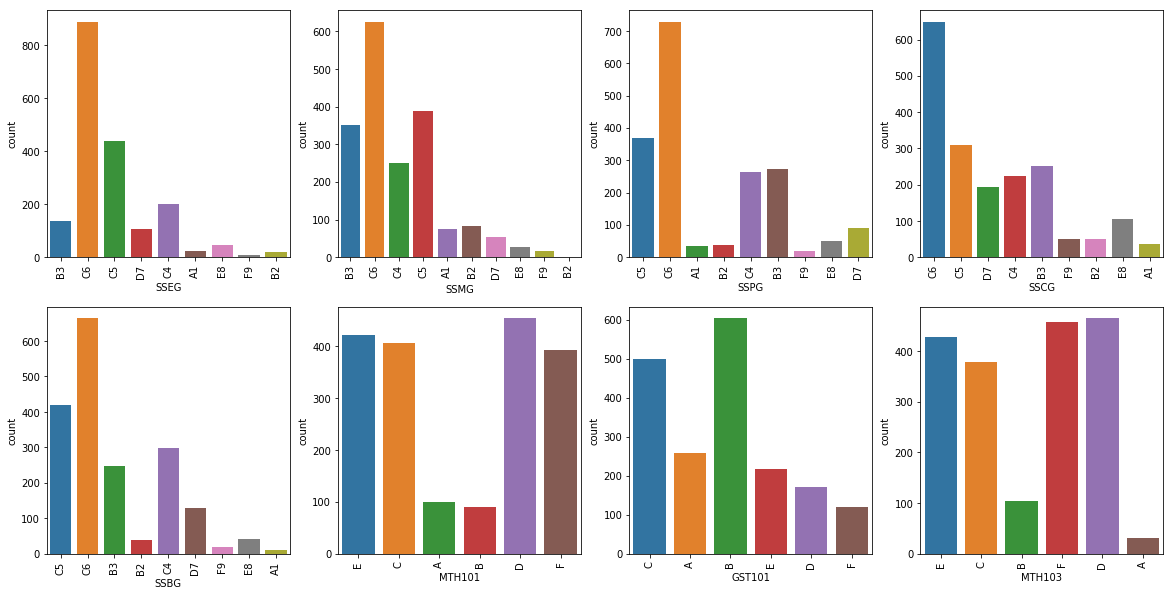

In [46]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df_train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)



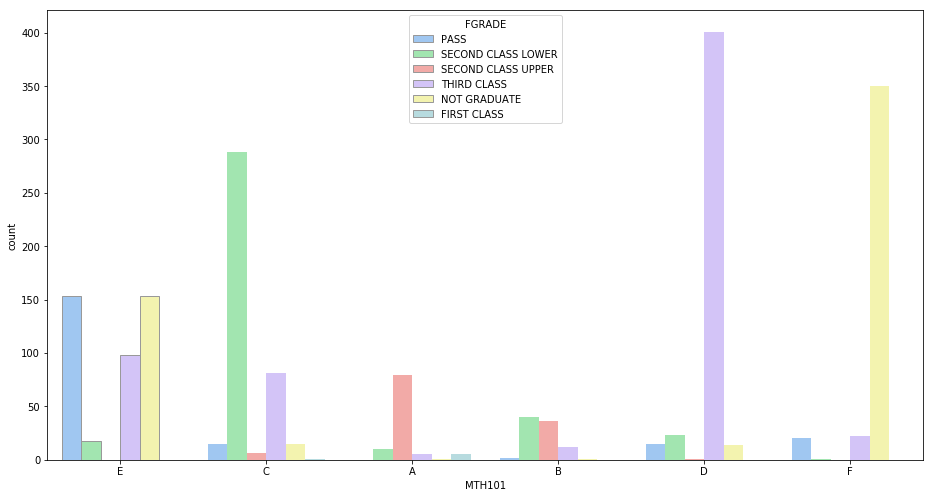

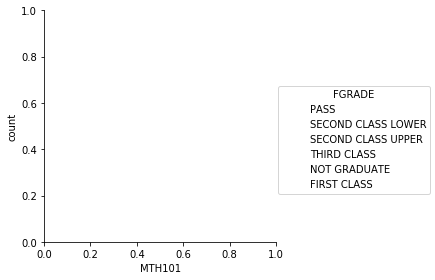

In [47]:
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax= sns.factorplot(ax=ax,x="MTH101", hue="FGRADE", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_train)



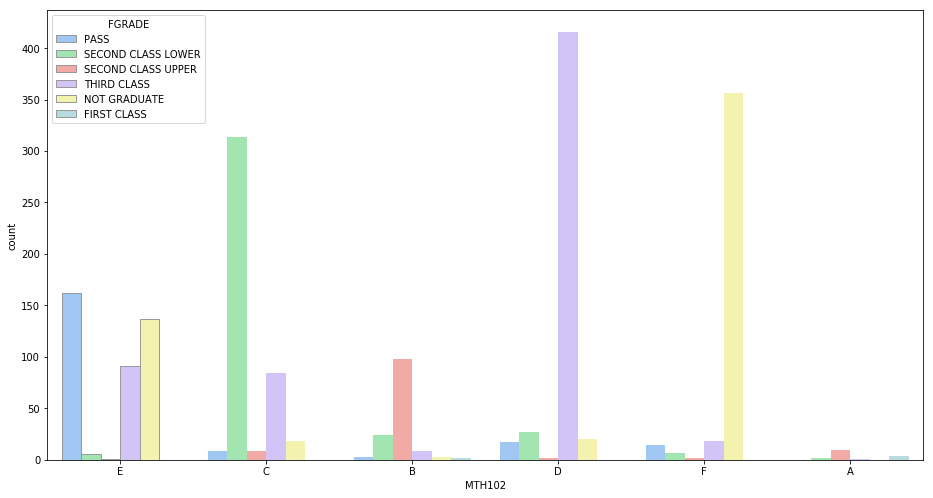

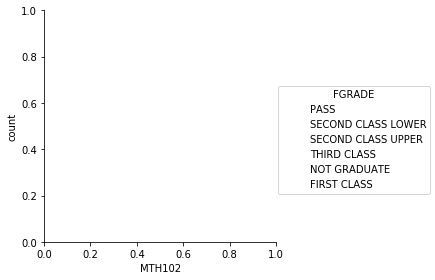

In [48]:
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax= sns.factorplot(ax=ax,x="MTH102", hue="FGRADE", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_train)


## CORRELATION BETWEEN FEATURE

Text(0.5,1,'Cramer V Correlation between Variables')

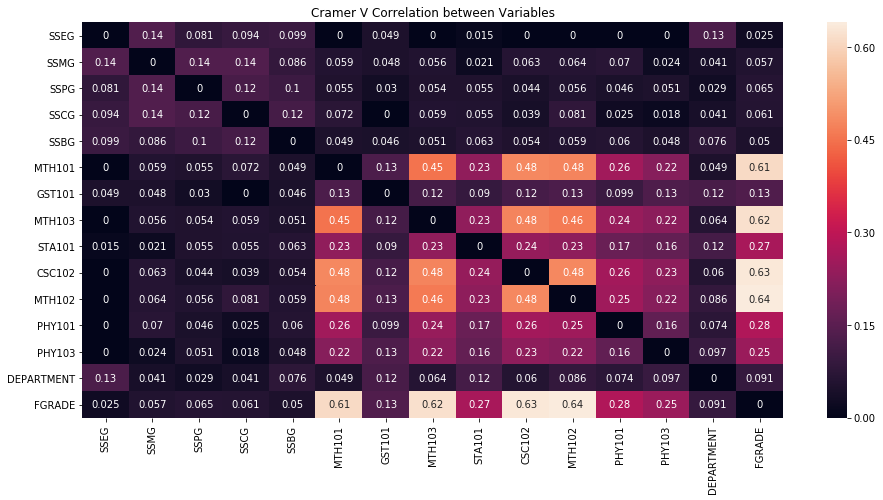

In [49]:
import itertools
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


cols = ['SSEG', 'SSMG', 'SSPG', 'SSCG', 'SSBG', 'MTH101', 'GST101',
       'MTH103', 'STA101', 'CSC102', 'MTH102', 'PHY101', 'PHY103', 'DEPARTMENT', 'FGRADE']
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df_train[col1], df_train[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(15.7, 7.27))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables")



In [50]:
df_t =df_train[['SSEG', 'SSMG', 'SSPG', 'SSCG', 'SSBG', 'MTH101', 'GST101',
       'MTH103', 'STA101', 'CSC102', 'MTH102', 'PHY101', 'PHY103','DEPARTMENT', 'FGRADE']]

In [51]:
df_x = df_train[['SSEG', 'SSMG', 'SSPG', 'SSCG', 'SSBG', 'MTH101', 'GST101',
       'MTH103', 'STA101', 'CSC102', 'MTH102', 'PHY101', 'PHY103','DEPARTMENT']]
df_y = df_train['FGRADE']



In [52]:
df_t

,SSEG,SSMG,SSPG,SSCG,SSBG,MTH101,GST101,MTH103,STA101,CSC102,MTH102,PHY101,PHY103,DEPARTMENT,FGRADE
0,B3,B3,C5,C6,C5,E,C,E,D,D,E,B,E,COMPUTER SCIENCE,PASS
1,C6,C6,C6,C6,C6,C,A,C,C,C,C,C,C,COMPUTER SCIENCE,SECOND CLASS LOWER
2,C5,C4,C6,C5,B3,A,A,B,A,A,B,A,A,COMPUTER SCIENCE,SECOND CLASS UPPER
3,D7,C6,C6,C6,B3,C,A,C,A,C,C,A,E,COMPUTER SCIENCE,SECOND CLASS LOWER
4,C6,C6,C6,C5,B2,C,B,C,A,C,B,A,B,COMPUTER SCIENCE,SECOND CLASS LOWER
5,C6,C6,A1,C6,C6,C,A,C,B,C,C,E,C,COMPUTER SCIENCE,SECOND CLASS LOWER
6,C5,C5,C5,D7,C5,C,B,C,E,C,C,A,C,COMPUTER SCIENCE,SECOND CLASS LOWER
7,C5,A1,B2,C4,C4,C,A,C,D,D,C,C,B,COMPUTER SCIENCE,SECOND CLASS LOWER
8,D7,C5,C5,C6,C5,B,A,E,F,C,B,A,D,COMPUTER SCIENCE,SECOND CLASS LOWER
9,C6,C6,C6,C6,C4,E,A,F,F,E,B,E,D,COMPUTER SCIENCE,PASS


In [53]:
df_t.dropna(inplace=True)

In [54]:
df_t

,SSEG,SSMG,SSPG,SSCG,SSBG,MTH101,GST101,MTH103,STA101,CSC102,MTH102,PHY101,PHY103,DEPARTMENT,FGRADE
0,B3,B3,C5,C6,C5,E,C,E,D,D,E,B,E,COMPUTER SCIENCE,PASS
1,C6,C6,C6,C6,C6,C,A,C,C,C,C,C,C,COMPUTER SCIENCE,SECOND CLASS LOWER
2,C5,C4,C6,C5,B3,A,A,B,A,A,B,A,A,COMPUTER SCIENCE,SECOND CLASS UPPER
3,D7,C6,C6,C6,B3,C,A,C,A,C,C,A,E,COMPUTER SCIENCE,SECOND CLASS LOWER
4,C6,C6,C6,C5,B2,C,B,C,A,C,B,A,B,COMPUTER SCIENCE,SECOND CLASS LOWER
5,C6,C6,A1,C6,C6,C,A,C,B,C,C,E,C,COMPUTER SCIENCE,SECOND CLASS LOWER
6,C5,C5,C5,D7,C5,C,B,C,E,C,C,A,C,COMPUTER SCIENCE,SECOND CLASS LOWER
7,C5,A1,B2,C4,C4,C,A,C,D,D,C,C,B,COMPUTER SCIENCE,SECOND CLASS LOWER
8,D7,C5,C5,C6,C5,B,A,E,F,C,B,A,D,COMPUTER SCIENCE,SECOND CLASS LOWER
9,C6,C6,C6,C6,C4,E,A,F,F,E,B,E,D,COMPUTER SCIENCE,PASS


In [55]:
df_y

0                     PASS
1       SECOND CLASS LOWER
2       SECOND CLASS UPPER
3       SECOND CLASS LOWER
4       SECOND CLASS LOWER
5       SECOND CLASS LOWER
6       SECOND CLASS LOWER
7       SECOND CLASS LOWER
8       SECOND CLASS LOWER
9                     PASS
10      SECOND CLASS LOWER
11             THIRD CLASS
12      SECOND CLASS LOWER
13      SECOND CLASS LOWER
14      SECOND CLASS UPPER
15      SECOND CLASS LOWER
16             THIRD CLASS
17             THIRD CLASS
18             THIRD CLASS
19             THIRD CLASS
20             THIRD CLASS
21      SECOND CLASS LOWER
22      SECOND CLASS LOWER
23             THIRD CLASS
24             THIRD CLASS
25      SECOND CLASS LOWER
26             THIRD CLASS
27      SECOND CLASS LOWER
28      SECOND CLASS LOWER
29      SECOND CLASS LOWER
               ...        
1857           THIRD CLASS
1858           THIRD CLASS
1859          NOT GRADUATE
1860          NOT GRADUATE
1861                  PASS
1862                  PASS
1

In [56]:
print("DF X")
print(df_x.head())
print("DF Y")
print(df_y.head())



DF X
  SSEG SSMG SSPG SSCG SSBG MTH101 GST101 MTH103 STA101 CSC102 MTH102 PHY101  \
0   B3   B3   C5   C6   C5      E      C      E      D      D      E      B   
1   C6   C6   C6   C6   C6      C      A      C      C      C      C      C   
2   C5   C4   C6   C5   B3      A      A      B      A      A      B      A   
3   D7   C6   C6   C6   B3      C      A      C      A      C      C      A   
4   C6   C6   C6   C5   B2      C      B      C      A      C      B      A   

  PHY103        DEPARTMENT  
0      E  COMPUTER SCIENCE  
1      C  COMPUTER SCIENCE  
2      A  COMPUTER SCIENCE  
3      E  COMPUTER SCIENCE  
4      B  COMPUTER SCIENCE  
DF Y
0                  PASS
1    SECOND CLASS LOWER
2    SECOND CLASS UPPER
3    SECOND CLASS LOWER
4    SECOND CLASS LOWER
Name: FGRADE, dtype: object


In [57]:
df_x.tail()



,SSEG,SSMG,SSPG,SSCG,SSBG,MTH101,GST101,MTH103,STA101,CSC102,MTH102,PHY101,PHY103,DEPARTMENT
1885,C5,C6,C5,C4,C6,E,E,D,E,D,F,E,E,STATISTICS
1886,E8,C6,B3,C6,C6,D,E,D,D,C,E,C,F,STATISTICS
1887,C6,C6,C5,C6,C4,E,D,E,E,E,C,E,D,STATISTICS
1888,C6,B3,B3,B3,B2,E,C,E,C,E,F,F,F,STATISTICS
1889,C6,C5,C5,C5,C4,D,E,E,D,D,E,E,E,STATISTICS


In [58]:
# drop Nan if any
df_x.dropna(inplace=True)
df_y.dropna(inplace=True)
df_t.dropna(inplace=True)


In [59]:
from sklearn import preprocessing

# Label encode the Predictor variables
for i in df_t.columns:
    print(i)
    le = preprocessing.LabelEncoder()
    df_t[i] = le.fit_transform(df_t[i])


SSEG
SSMG
SSPG
SSCG
SSBG
MTH101
GST101
MTH103
STA101
CSC102
MTH102
PHY101
PHY103
DEPARTMENT
FGRADE


In [60]:
df_t

,SSEG,SSMG,SSPG,SSCG,SSBG,MTH101,GST101,MTH103,STA101,CSC102,MTH102,PHY101,PHY103,DEPARTMENT,FGRADE
0,2,3,4,5,4,4,2,4,3,3,4,1,4,0,2
1,5,6,5,5,5,2,0,2,2,2,2,2,2,0,3
2,4,4,5,4,2,0,0,1,0,0,1,0,0,0,4
3,6,6,5,5,2,2,0,2,0,2,2,0,4,0,3
4,5,6,5,4,1,2,1,2,0,2,1,0,1,0,3
5,5,6,0,5,5,2,0,2,1,2,2,4,2,0,3
6,4,5,4,6,4,2,1,2,4,2,2,0,2,0,3
7,4,1,1,3,3,2,0,2,3,3,2,2,1,0,3
8,6,5,4,5,4,1,0,4,5,2,1,0,3,0,3
9,5,6,5,5,3,4,0,5,5,4,1,4,3,0,2


## DATA TRANSFORMATION

In [61]:
from sklearn import preprocessing

# Label encode the Predictor variables
for i in df_x.columns:
    print(i)
    le = preprocessing.LabelEncoder()
    df_x[i] = le.fit_transform(df_x[i])



SSEG
SSMG
SSPG
SSCG
SSBG
MTH101
GST101
MTH103
STA101
CSC102
MTH102
PHY101
PHY103
DEPARTMENT


In [62]:
df_x.head()



,SSEG,SSMG,SSPG,SSCG,SSBG,MTH101,GST101,MTH103,STA101,CSC102,MTH102,PHY101,PHY103,DEPARTMENT
0,2,3,4,5,4,4,2,4,3,3,4,1,4,0
1,5,6,5,5,5,2,0,2,2,2,2,2,2,0
2,4,4,5,4,2,0,0,1,0,0,1,0,0,0
3,6,6,5,5,2,2,0,2,0,2,2,0,4,0
4,5,6,5,4,1,2,1,2,0,2,1,0,1,0


In [63]:
# One Hot Encoding
onehot_encoder = preprocessing.OneHotEncoder(sparse=True) # create a sparse matrix
onehot_encoded = onehot_encoder.fit_transform(df_x)
print(onehot_encoded)



  (0, 2)	1.0
  (0, 12)	1.0
  (0, 23)	1.0
  (0, 33)	1.0
  (0, 41)	1.0
  (0, 50)	1.0
  (0, 54)	1.0
  (0, 62)	1.0
  (0, 67)	1.0
  (0, 73)	1.0
  (0, 80)	1.0
  (0, 83)	1.0
  (0, 92)	1.0
  (0, 94)	1.0
  (1, 5)	1.0
  (1, 15)	1.0
  (1, 24)	1.0
  (1, 33)	1.0
  (1, 42)	1.0
  (1, 48)	1.0
  (1, 52)	1.0
  (1, 60)	1.0
  (1, 66)	1.0
  (1, 72)	1.0
  (1, 78)	1.0
  :	:
  (1864, 30)	1.0
  (1864, 38)	1.0
  (1864, 50)	1.0
  (1864, 54)	1.0
  (1864, 62)	1.0
  (1864, 66)	1.0
  (1864, 74)	1.0
  (1864, 81)	1.0
  (1864, 87)	1.0
  (1864, 93)	1.0
  (1864, 96)	1.0
  (1865, 5)	1.0
  (1865, 14)	1.0
  (1865, 23)	1.0
  (1865, 32)	1.0
  (1865, 40)	1.0
  (1865, 49)	1.0
  (1865, 56)	1.0
  (1865, 62)	1.0
  (1865, 67)	1.0
  (1865, 73)	1.0
  (1865, 80)	1.0
  (1865, 86)	1.0
  (1865, 92)	1.0
  (1865, 96)	1.0


In [64]:
print("Shape of Sparse Matrix: ", onehot_encoded.shape)



Shape of Sparse Matrix:  (1866, 97)


In [65]:
df_x.head() # Transformed Predictor Variable



,SSEG,SSMG,SSPG,SSCG,SSBG,MTH101,GST101,MTH103,STA101,CSC102,MTH102,PHY101,PHY103,DEPARTMENT
0,2,3,4,5,4,4,2,4,3,3,4,1,4,0
1,5,6,5,5,5,2,0,2,2,2,2,2,2,0
2,4,4,5,4,2,0,0,1,0,0,1,0,0,0
3,6,6,5,5,2,2,0,2,0,2,2,0,4,0
4,5,6,5,4,1,2,1,2,0,2,1,0,1,0


In [66]:
# Label encode Target variables
le = preprocessing.LabelEncoder()
df_y = le.fit_transform(df_y)


print(le.classes_)


['FIRST CLASS' 'NOT GRADUATE' 'PASS' 'SECOND CLASS LOWER'
 'SECOND CLASS UPPER' 'THIRD CLASS']


In [67]:
print(le.classes_)
df_y.shape



['FIRST CLASS' 'NOT GRADUATE' 'PASS' 'SECOND CLASS LOWER'
 'SECOND CLASS UPPER' 'THIRD CLASS']


(1866,)

In [68]:
df_y

array([2, 3, 4, ..., 2, 2, 5])

### CLASSIFICATION WITH DECISION TREE

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf_dt = DecisionTreeClassifier(max_depth=10)
clf_oh = DecisionTreeClassifier(max_depth=10)



In [70]:
print(clf_dt)

DecisionTreeClassifier(max_depth=10)


In [71]:
print(clf_oh)


DecisionTreeClassifier(max_depth=10)


##### SPLITTING THE TRANSFORMED FEATURES TO TRAIN AND TEST SET

In [72]:
# split to training and test set
from sklearn.model_selection import train_test_split

# slpit data set: 20% test set
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)
X_train_oh, X_test_oh, y_train_oh, y_test_oh = train_test_split(onehot_encoded, df_y, test_size=0.3, random_state=42)



In [73]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)


X_train Shape:  (1306, 14)
X_test Shape:  (560, 14)
y_train Shape:  (1306,)
y_test Shape:  (560,)


In [74]:
print("X_train_oh Shape: ", X_train_oh.shape)
print("X_test_oh Shape: ", X_test_oh.shape)
print("y_train_oh Shape: ", y_train_oh.shape)
print("y_test_oh Shape: ", y_test_oh.shape)


X_train_oh Shape:  (1306, 97)
X_test_oh Shape:  (560, 97)
y_train_oh Shape:  (1306,)
y_test_oh Shape:  (560,)


In [75]:
# fit to Label encoded data
clf_dt.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=10)

In [76]:
clf_oh.fit(X_train_oh, y_train_oh)



DecisionTreeClassifier(max_depth=10)

In [77]:
# split to training and test set
from sklearn.model_selection import train_test_split

# slpit data set: 30% test set
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)
X_train_oh, X_test_oh, y_train_oh, y_test_oh = train_test_split(onehot_encoded, df_y, test_size=0.3, random_state=42)



In [78]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)


X_train Shape:  (1306, 14)
X_test Shape:  (560, 14)
y_train Shape:  (1306,)
y_test Shape:  (560,)


In [79]:
print("X_train_oh Shape: ", X_train_oh.shape)
print("X_test_oh Shape: ", X_test_oh.shape)
print("y_train_oh Shape: ", y_train_oh.shape)
print("y_test_oh Shape: ", y_test_oh.shape)


X_train_oh Shape:  (1306, 97)
X_test_oh Shape:  (560, 97)
y_train_oh Shape:  (1306,)
y_test_oh Shape:  (560,)


In [80]:
# fit to Label encoded data
clf_dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10)

In [81]:
clf_oh.fit(X_train_oh, y_train_oh)


DecisionTreeClassifier(max_depth=10)

# CLASSIFICATION RESULTS FOR USING DECISION TREE

In [82]:
# Evaluate on test data set - Label Encoding
import time
import sys

pred = clf_dt.predict(X_test)
start = time.time()

score = clf_dt.score(X_test, y_test)


print("Accurancy:",round((score*100),2))
end = time.time()
print("Execution time for building the Tree is: %f"%(float(end)- float(start)),'S')
print("Size of Data set before feature selection: %.2f KB"%(sys.getsizeof (X_train)/(1000)))

Accurancy: 81.96
Execution time for building the Tree is: 0.008000 S
Size of Data set before feature selection: 83.61 KB


In [83]:
# Evaluate on test data set - One Hot Encoding
import time
import sys
pred_oh = clf_oh.predict(X_test_oh)
start = time.time()

score = clf_oh.score(X_test_oh, y_test_oh)
end = time.time()

print("Accurancy:",round((score*100),2))
print("Execution time for building the Tree is: %f"%(float(end)- float(start)),'S')
print("Size of Data set before feature selection: %.2f KB"%(sys.getsizeof (X_train)/(1000)))

Accurancy: 83.57
Execution time for building the Tree is: 0.000000 S
Size of Data set before feature selection: 83.61 KB


In [84]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


ModuleNotFoundError: No module named 'sklearn.externals.six'

##### CLASSIFICATION WITH RANDOM FOREST

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf_dt = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_oh = RandomForestClassifier(n_estimators=10, max_depth = 3)

print(rf_oh)


RandomForestClassifier(max_depth=3, n_estimators=10)


In [86]:
# fit to Label encoded data
rf_dt.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, n_estimators=10)

In [87]:
clf_oh.fit(X_train_oh, y_train_oh)

DecisionTreeClassifier(max_depth=10)

In [88]:
#import time
#start = time.time()
#rf_dt.fit(X_train, y_train)

#end = time.time()

In [89]:
rf_oh.fit(X_train_oh, y_train_oh)


RandomForestClassifier(max_depth=3, n_estimators=10)

# CLASSIFICATION RESULTS WITH RANDOM FOREST

In [90]:
# Evaluate on test data set - One label Encoding
import time
import sys
start = time.time()
rf_dt.fit(X_train, y_train)



rf_pred_dt = rf_dt.predict(X_test)
end = time.time()
score = rf_dt.score(X_test, y_test)

print("Accurancy:",round((score*100),2))
print("Execution time for building the Tree is: %f"%(float(end)- float(start)),'S')
print("Size of Data set before feature selection: %.2f KB"%(sys.getsizeof (X_train)/(1000)))

Accurancy: 81.61
Execution time for building the Tree is: 0.039996 S
Size of Data set before feature selection: 83.61 KB


In [91]:
# Evaluate on test data set - One Hot Encoding
import time
import sys
start = time.time()

rf_pred_oh = rf_oh.predict(X_test_oh)
score = rf_oh.score(X_test_oh, y_test_oh)
end = time.time()

print("Accurancy:",round((score*100),2))
print("Execution time for building the Tree is: %f"%(float(end)- float(start)),'S')
print("Size of Data set before feature selection: %.2f KB"%(sys.getsizeof (X_train)/(1000)))


Accurancy: 82.14
Execution time for building the Tree is: 0.007997 S
Size of Data set before feature selection: 83.61 KB


In [92]:
# Evaluate on test data set with best prediction - Label Encoding
# Evaluate on test data set - One label Encoding
rf_pred_dt = rf_dt.predict(X_test)
score = rf_dt.score(X_test, y_test)
#print(score)
print("Predicted Label")
print (rf_pred_dt)

Predicted Label
[3 5 5 4 5 1 3 3 1 1 5 3 1 1 5 5 3 1 5 3 1 1 5 5 1 5 1 3 5 5 1 1 5 1 1 5 1
 5 5 5 1 3 1 1 5 1 5 3 5 3 4 3 1 5 5 3 3 1 5 5 4 3 5 5 1 3 5 3 5 1 1 5 1 5
 5 5 5 5 1 5 3 1 3 1 5 5 5 3 1 3 5 1 5 3 5 5 5 5 4 5 5 1 5 5 5 5 5 5 1 5 1
 5 1 1 1 5 1 1 1 1 1 5 3 4 5 3 5 3 5 5 1 5 1 1 5 5 3 3 1 3 5 1 5 5 4 1 5 1
 4 1 5 3 5 3 1 3 1 5 5 5 1 3 5 1 1 4 1 5 5 5 5 1 3 5 3 1 5 5 3 5 5 5 3 5 1
 5 1 5 5 1 1 5 1 5 5 4 3 1 5 5 3 5 1 5 5 5 1 5 3 5 5 5 1 5 1 3 1 5 1 5 5 5
 5 5 5 1 1 5 5 5 5 1 5 3 3 1 4 5 1 5 5 3 5 1 1 4 1 1 1 1 1 1 3 1 3 5 1 5 1
 3 1 4 3 3 3 5 5 1 1 4 1 3 5 4 1 5 3 5 3 1 5 1 5 1 1 1 3 5 5 1 1 1 1 1 1 3
 1 1 3 3 1 4 5 1 5 1 3 4 3 1 4 3 3 5 5 1 5 5 5 5 3 3 5 3 4 1 1 1 3 5 1 3 1
 5 5 5 1 1 1 3 1 5 1 5 5 5 3 3 5 3 5 3 5 1 5 1 3 5 5 1 1 1 5 3 1 5 3 5 1 5
 3 5 5 1 5 3 3 5 5 3 5 1 5 1 5 5 1 1 3 5 5 5 5 5 5 3 3 1 4 5 1 5 5 5 5 1 5
 5 1 1 3 1 5 5 5 5 1 5 5 4 1 1 1 3 1 5 5 5 1 5 5 5 3 1 1 3 1 3 3 1 1 1 1 4
 5 5 1 5 1 1 3 1 5 5 1 5 5 5 5 5 5 1 5 4 1 1 4 1 1 1 3 5 3 3 1 5 1 5 5 1 1
 5 1 3 3 

In [93]:
print("True Label") 
print(y_test)

True Label
[3 5 5 4 5 1 3 3 1 2 2 3 1 2 5 2 3 1 5 3 1 1 5 5 1 2 1 3 5 5 2 1 5 1 2 5 2
 5 5 1 2 3 1 1 1 1 5 3 5 3 4 3 2 3 5 3 3 1 5 5 4 3 5 5 1 3 5 3 5 1 1 5 1 5
 3 5 5 5 1 5 3 2 1 2 5 5 5 3 1 3 1 1 1 5 5 5 5 5 4 5 5 2 5 5 1 5 5 5 1 5 1
 5 1 2 1 5 1 1 1 1 1 5 3 4 5 5 5 4 5 5 1 1 1 1 1 5 3 3 1 5 5 1 5 5 4 1 1 1
 4 5 5 3 5 3 1 3 1 5 5 5 1 3 3 1 1 4 1 5 5 5 5 2 3 5 3 1 5 2 3 5 5 5 3 2 1
 5 1 5 5 1 1 5 1 5 5 4 3 1 5 3 3 5 1 5 5 2 1 5 3 5 5 5 1 5 2 3 1 5 1 5 5 3
 5 1 5 1 1 5 5 2 5 1 5 3 3 2 4 2 1 5 5 3 3 1 1 4 1 2 2 2 1 2 3 1 5 5 1 5 1
 3 5 4 3 5 3 5 5 1 1 4 2 3 3 4 2 5 3 5 3 1 5 1 2 1 1 1 3 3 5 2 1 1 2 1 1 3
 1 2 3 3 1 4 5 1 5 1 3 4 3 1 5 3 3 5 5 5 5 5 5 5 3 5 3 3 4 1 1 1 3 5 1 3 1
 5 3 5 1 1 1 3 1 1 1 5 2 5 3 3 5 3 2 3 5 2 5 1 3 3 5 1 1 2 5 3 1 5 3 5 1 5
 3 5 5 2 5 3 3 2 5 3 5 2 3 1 5 5 1 1 3 5 5 3 5 5 5 3 3 1 4 5 1 1 2 5 5 1 5
 5 1 1 3 2 5 3 5 3 1 5 5 4 1 1 1 3 1 5 5 5 1 5 5 5 3 1 1 3 1 3 3 1 1 1 1 4
 5 2 1 5 1 1 3 2 5 5 1 5 5 5 5 5 3 2 2 4 1 2 0 1 2 1 3 5 3 4 1 5 1 2 5 1 1
 2 1 4 3 2 5 1

###### CONFUSION MATRIX USING RESULT FROM DECISION TREE

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



Normalized confusion matrix
[[ 0.33333333  0.          0.          0.          0.66666667  0.        ]
 [ 0.          0.81764706  0.11176471  0.          0.          0.07058824]
 [ 0.          0.33333333  0.57894737  0.          0.          0.0877193 ]
 [ 0.          0.          0.00900901  0.81081081  0.03603604  0.14414414]
 [ 0.07142857  0.          0.          0.03571429  0.89285714  0.        ]
 [ 0.          0.0104712   0.02617801  0.06806283  0.          0.89528796]]


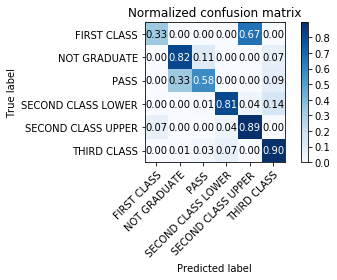

In [95]:
class_names = le.classes_

# Plot non-normalized confusion matrix
#plot_confusion_matrix(y_test, pred, classes=class_names,
  #                    title='Confusion matrix, without normalization')


# Plot normalized confusion matrix
plot_confusion_matrix(y_test, pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [96]:
#from sklearn.metrics import randomForest_report
from sklearn.metrics import classification_report, confusion_matrix


# 0 - pass, 1 - Second Class lower, 2 - Second Class Upper, 3 - Third Class
print(classification_report(y_test, pred))



              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.87      0.82      0.84       170
           2       0.57      0.58      0.57        57
           3       0.87      0.81      0.84       111
           4       0.81      0.89      0.85        28
           5       0.84      0.90      0.87       191

    accuracy                           0.82       560
   macro avg       0.71      0.72      0.72       560
weighted avg       0.82      0.82      0.82       560



Feature 1: 6.422465
Feature 2: 12.536016
Feature 3: 12.511042
Feature 4: 22.646252
Feature 5: 10.969454
Feature 6: 590.921632
Feature 7: 155.649170
Feature 8: 446.566587
Feature 9: 285.678007
Feature 10: 574.044505
Feature 11: 471.506498
Feature 12: 304.944492
Feature 13: 209.268341
Feature 14: 16.253006


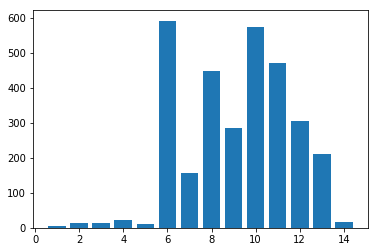

In [97]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k=6)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i+1, fs.scores_[i]))
# plot the scores
pyplot.bar([i+1 for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 83.39


###### FEATURE SELECTION TO GET THE BEST FEATURES AND REMOVE REDUNDANT FEATURES

In [99]:
#Import the necessary libraries
#Import sklearn's feature selection algorithm 
from sklearn.feature_selection import RFE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Import LogisticRegression for performing chi square test 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


###### Selecting features based on correlation

In [100]:
#corr = df_t.corr()

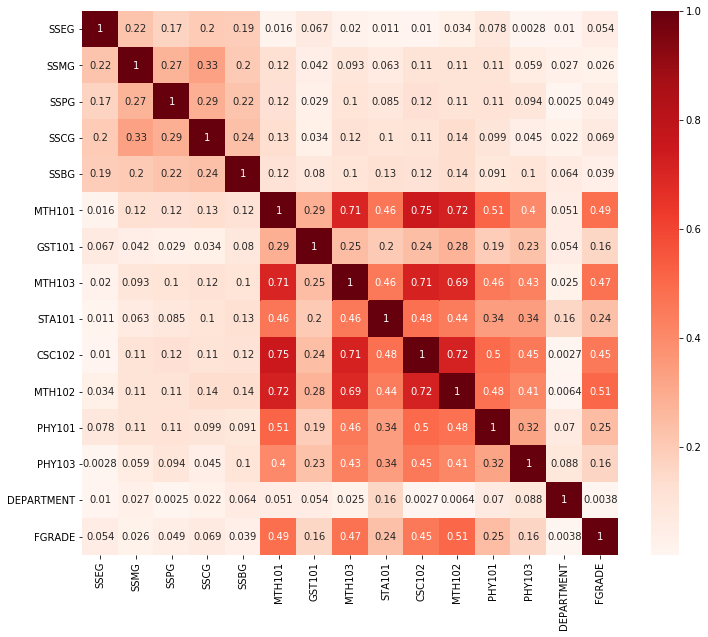

In [101]:
#sns.heatmap(corr)

#print("Correlation heatmap for the Dataset")

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_t.corr()
sns.heatmap(abs(cor), annot=True, cmap=plt.cm.Reds)
plt.show()



# Selecting Feature based on Recursive Feature Elimination (RFE)


In [103]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, (high_score*100)))


Optimum number of features: 1
Optimum number of features: 2
Optimum number of features: 3
Optimum number of features: 4
Score with 4 features: 82.857143


In [104]:
cols = list(df_x.columns)
model =LogisticRegression()#Initializing RFE model
rfe = RFE(model, nof)             #Transforming data using RFE
X_rfe = rfe.fit_transform(df_x,df_y)  #Fitting the data to model
model.fit(X_rfe,df_y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['MTH101', 'MTH103', 'CSC102', 'MTH102'], dtype='object')


In [105]:
model =LogisticRegression()

In [106]:
rfe = RFE(model, nof)

In [107]:
fit = rfe.fit(df_x,df_y)

In [108]:
print("Selected Features")
print("Selected Features: %s"%rfe.support_)
print("Feature Ranking: %s"% rfe.ranking_) # Ranking the feature, Selecting the ones  marked as True or 1

Selected Features
Selected Features: [False False False False False  True False  True False  True  True False
 False False]
Feature Ranking: [ 2  5  7 10  8  1 11  1  4  1  1  6  9  3]


###### MAKING THE SELECTED FEATURES AS OUR NEW TRAINING SET

In [109]:
#this is the function that filters the dataframe 
def filters(arr):
    n_arr=arr.tolist()
    heaps =[]   
    for j in range(len(arr)):
        if arr[j]==1:
             heaps.append(j)
    return heaps


##use the function to filter the table
##frame is your dataframe
selected=rfe.ranking_
new_train= filters(selected)
sel_train=df_t.iloc[ : , new_train]    
print(sel_train)


      MTH101  MTH103  CSC102  MTH102
0          4       4       3       4
1          2       2       2       2
2          0       1       0       1
3          2       2       2       2
4          2       2       2       1
5          2       2       2       2
6          2       2       2       2
7          2       2       3       2
8          1       4       2       1
9          4       5       4       1
10         2       2       2       2
11         4       3       3       2
12         3       2       2       2
13         2       2       2       2
14         0       1       0       1
15         1       4       2       1
16         3       5       3       3
17         3       4       3       4
18         2       3       3       2
19         3       3       4       3
20         3       3       3       3
21         2       2       2       2
22         2       2       2       2
23         3       2       3       3
24         3       2       4       3
25         2       3       2       3
2

In [110]:
#Cag=df_train[['MTH101', 'MTH103', 'CSC102','MTH102']]

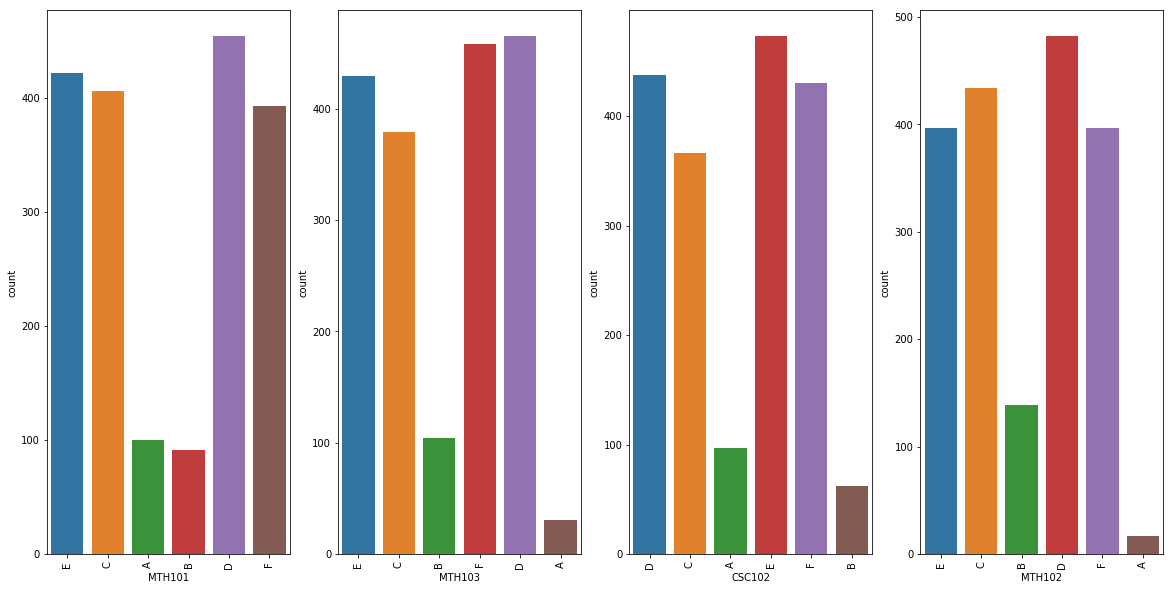

In [111]:
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
for variable, subplot in zip(selected_features_rfe, ax.flatten()):
    sns.countplot(df_train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)


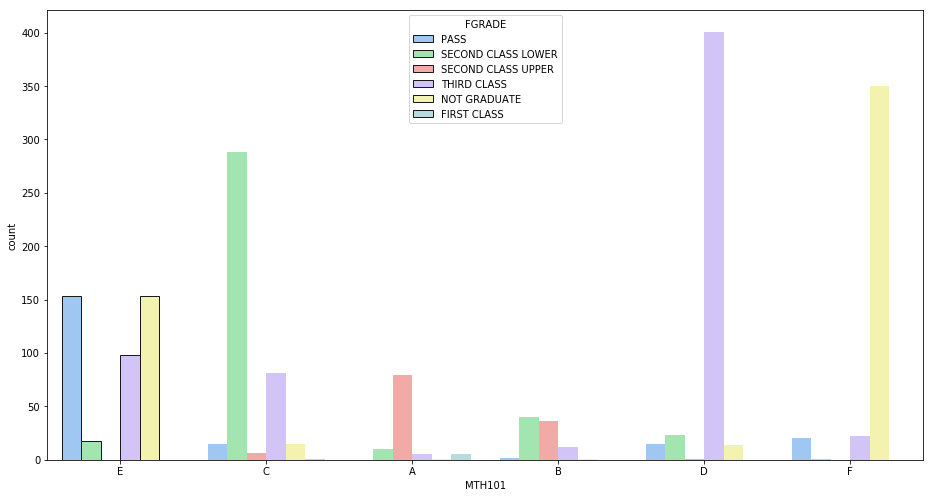

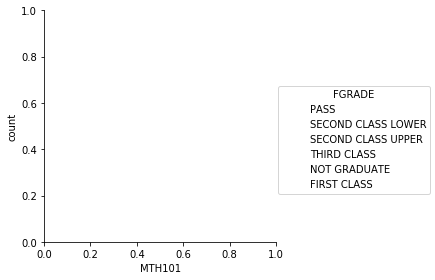

In [112]:
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax= sns.factorplot(ax=ax,x="MTH101", hue="FGRADE", 
            palette="pastel", edgecolor=".10",kind="count",
            data=df_train)


#  USING THE SELECTED FEATURE ON RANDOM FOREST FROM SCIKIT

In [119]:
# split to training and test set
from sklearn.model_selection import train_test_split

# slpit data set: 20% test set
X_train, X_test, y_train, y_test = train_test_split(sel_train, df_y, test_size=0.3, random_state=42)
#X_train_oh, X_test_oh, y_train_oh, y_test_oh = train_test_split(onehot_encoded, df_y, test_size=0.2, random_state=42)



    


In [120]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)


X_train Shape:  (1306, 4)
X_test Shape:  (560, 4)
y_train Shape:  (1306,)
y_test Shape:  (560,)


In [121]:
rf_dtb = RandomForestClassifier(n_estimators=10, max_depth = 10)

#  Using the Selected feature  Buiding the model using Random Forest

In [116]:
# Evaluate on test data set - One label Encoding
import time
# fit to Label encoded data
#rf_dtb.fit(X_train, y_train)
import time
start=0
end=0
start = time.time()
rf_dtb.fit(X_train, y_train)

rf_pred_dtb = rf_dtb.predict(X_test)
end = time.time()
score = rf_dtb.score(X_test, y_test)
rf_probs = rf_dtb.predict_proba(X_test)[:, 1]
print("Accurancy:",round((score*100),2))
print("Execution time for building the Tree is: %f"%(float(end)- float(start)),'S')
print("Size of Data set after feature selection: %.2f KB"%(sys.getsizeof (X_train)/(1000)))

print( )
print()
print()


Accurancy: 91.61
Execution time for building the Tree is: 0.047992 S
Size of Data set after feature selection: 31.37 KB





In [122]:
# split to training and test set
from sklearn.model_selection import train_test_split

# slpit data set: 20% test set
X_train, X_test, y_train, y_test = train_test_split(sel_train, df_y, test_size=0.3, random_state=42)
#X_train_oh, X_test_oh, y_train_oh, y_test_oh = train_test_split(onehot_encoded, df_y, test_size=0.2, random_state=42)


In [123]:
clf_dtb = DecisionTreeClassifier(max_depth=10)

In [130]:
# Evaluate on test data set - Label Encoding
import time
import sys
clf_dtb.fit(X_train,y_train)
pred = clf_dtb.predict(X_test)
start = time.time()

score = clf_dtb.score(X_test, y_test)


print("Accurancy:",round((score*100),2))
end = time.time()
print("Execution time for building the Tree is: %f"%(float(end)- float(start)),'S')
print("Size of Data set after feature selection: %.2f KB"%(sys.getsizeof (X_train)/(1000)))

Accurancy: 89.29
Execution time for building the Tree is: 0.000000 S
Size of Data set after feature selection: 31.37 KB


In [131]:
print(rf_probs)

[ 0.          0.          0.          0.          0.          1.          0.
  0.          1.          0.64848374  0.41809524  0.          0.74641359
  0.06734504  0.          0.          0.          0.96838991  0.          0.
  1.          1.          0.          0.          1.          0.41809524
  1.          0.          0.          0.          0.25316611  0.96838991
  0.          1.          0.35625916  0.          0.64848374  0.          0.
  0.          0.06734504  0.          1.          1.          0.7         1.
  0.          0.          0.          0.          0.          0.
  0.25316611  0.          0.          0.          0.          1.          0.
  0.          0.          0.          0.          0.          0.89273525
  0.          0.          0.          0.          1.          0.8         0.
  0.855       0.          0.1         0.          0.          0.          1.
  0.          0.          0.85447282  0.3         0.06734504  0.          0.
  0.          0.          0

In [119]:
print(rf_pred_dtb)

[3 5 5 4 5 1 3 3 1 1 2 3 1 2 5 5 3 1 5 3 1 1 5 5 1 2 1 3 5 5 2 1 5 1 2 5 1
 5 5 2 2 3 1 1 1 1 5 3 5 3 4 3 2 5 5 3 3 1 5 5 4 3 5 5 1 3 5 3 5 1 1 5 1 5
 5 5 5 5 1 5 3 1 3 2 5 5 5 3 1 3 1 1 1 3 5 5 5 5 4 5 5 2 5 5 5 5 5 5 1 5 1
 5 1 1 1 5 1 1 1 1 1 5 4 4 5 3 5 3 5 5 1 5 1 1 1 5 3 3 2 3 5 1 5 5 4 1 5 1
 4 5 5 3 2 3 1 3 5 5 5 5 1 3 3 1 1 4 1 5 5 5 5 1 3 5 3 1 5 2 3 5 5 5 3 2 1
 5 1 5 5 1 1 5 1 5 5 4 3 1 5 3 3 5 1 5 5 5 1 5 3 5 5 5 1 5 2 3 1 5 1 5 5 5
 5 1 5 1 1 5 5 2 5 1 5 3 3 2 4 2 1 5 3 3 5 1 1 4 1 2 2 2 1 2 3 1 5 5 1 5 1
 3 1 4 3 3 3 5 5 1 1 4 2 3 5 4 2 5 3 5 3 1 5 1 1 1 1 1 3 3 5 5 1 1 1 1 1 3
 1 1 3 3 1 4 5 1 5 1 3 4 5 1 4 3 3 5 5 5 5 3 5 5 3 3 1 3 4 1 1 1 3 5 2 3 1
 5 3 5 1 1 2 3 1 1 1 5 2 5 3 3 5 5 2 4 5 2 5 5 4 3 5 5 1 1 5 3 1 5 3 5 1 5
 3 5 5 1 5 3 3 2 5 3 5 2 3 1 5 5 1 1 3 5 5 3 5 5 5 3 3 1 4 5 1 1 2 5 5 1 5
 5 1 1 3 2 5 5 5 3 1 5 5 4 1 1 1 3 1 5 5 5 2 5 5 5 3 1 1 3 1 3 3 1 1 1 1 4
 5 2 1 5 1 1 3 2 5 5 1 5 5 2 5 5 3 1 5 4 1 2 4 1 2 2 3 5 3 4 1 5 1 5 5 1 1
 2 1 4 3 2 5 1 1 1 5 2 4 

In [120]:
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs


# feature selection


X_train_fs, X_test_fs = select_features(X_train, y_train, X_test)

# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 82.68


Feature 1: 590.921632
Feature 2: 446.566587
Feature 3: 574.044505
Feature 4: 471.506498


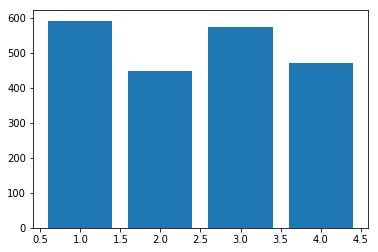

In [121]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i+1, fs.scores_[i]))
# plot the scores
pyplot.bar([i+1 for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [122]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
#labels = np.array(df_train.pop('class_names '))
roc_value = roc_auc_score(class_names, rf_probs)


ValueError: multi_class must be in ('ovo', 'ovr')

In [123]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report, confusion_matrix

class_names = le.classes_
print(confusion_matrix(y_test, rf_pred_dtb))


print(classification_report(y_test, rf_pred_dtb))

[[  1   0   0   0   2   0]
 [  0 153   9   1   0   7]
 [  0  12  40   0   0   5]
 [  0   1   0  97   3  10]
 [  0   0   0   1  27   0]
 [  0   1   2   7   1 180]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.92      0.90      0.91       170
           2       0.78      0.70      0.74        57
           3       0.92      0.87      0.89       111
           4       0.82      0.96      0.89        28
           5       0.89      0.94      0.92       191

    accuracy                           0.89       560
   macro avg       0.89      0.79      0.81       560
weighted avg       0.89      0.89      0.89       560



###### CONFUSION MATRIX AND CLASSIFICATION REPORT

In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, rf_pred_dtb, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, rf_pred_dtb)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, rf_pred_dtb)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



Confusion matrix, without normalization
[[  1   0   0   0   2   0]
 [  0 153   9   1   0   7]
 [  0  12  40   0   0   5]
 [  0   1   0  97   3  10]
 [  0   0   0   1  27   0]
 [  0   1   2   7   1 180]]
Normalized confusion matrix
[[ 0.33333333  0.          0.          0.          0.66666667  0.        ]
 [ 0.          0.9         0.05294118  0.00588235  0.          0.04117647]
 [ 0.          0.21052632  0.70175439  0.          0.          0.0877193 ]
 [ 0.          0.00900901  0.          0.87387387  0.02702703  0.09009009]
 [ 0.          0.          0.          0.03571429  0.96428571  0.        ]
 [ 0.          0.0052356   0.0104712   0.03664921  0.0052356   0.94240838]]


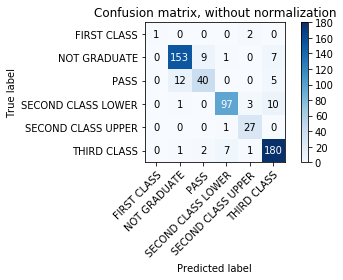

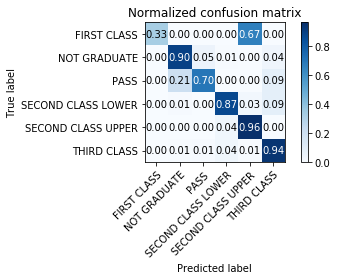

In [125]:
lass_names = le.classes_

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, rf_pred_dtb, classes=class_names,
                      title='Confusion matrix, without normalization')


# Plot normalized confusion matrix
plot_confusion_matrix(y_test, rf_pred_dtb, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [126]:
#from sklearn.metrics import randomForest_report
from sklearn.metrics import classification_report, confusion_matrix


# 0 - pass, 1 - Second Class lower, 2 - Second Class Upper, 3 - Third Class
print(classification_report(y_test, rf_pred_dtb))



              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.92      0.90      0.91       170
           2       0.78      0.70      0.74        57
           3       0.92      0.87      0.89       111
           4       0.82      0.96      0.89        28
           5       0.89      0.94      0.92       191

    accuracy                           0.89       560
   macro avg       0.89      0.79      0.81       560
weighted avg       0.89      0.89      0.89       560



###### MODIFYING THE RANDOM FOREST ALGORITHM  AND USING THE SELECTED FEATURES AS NEW TRAING SET

In [127]:
# Random Forest Algorithm 
import pandas as pd
import numpy as np
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import sys

# Load a CSV file
def load_csv(filename):
	dataset3 = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset3.append(row)
	return dataset3

# Convert string column to float
#def str_column_to_float(dataset3, column):
#	for row in dataset3:
#		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset3, column):
	class_values = [row[column] for row in dataset3]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset3:
		row[column] = lookup[row[column]]
	return lookup

# Split a dataset3 into k folds
def cross_validation_split(dataset3, n_folds):
	dataset3_split = list()
	dataset3_copy = list(dataset3)
	fold_size = int(len(dataset3) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset3_copy))
			fold.append(dataset3_copy.pop(index))
		dataset3_split.append(fold)
	return dataset3_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset3, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset3, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# Split a dataset3 based on an attribute and an attribute value
def test_split(index, value, dataset3):
	left, right = list(), list()
	for row in dataset3:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right

# Calculate the Gini index for a split dataset3
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += n_features*(p * p)
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	return gini

# Select the best split point for a dataset3
def get_split(dataset3, n_features):
	class_values = list(set(row[-1] for row in dataset3))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	features = list()
	while len(features) < n_features:
		index = randrange(len(dataset3[0])-1)
		if index not in features:
			features.append(index)
	for index in features:
		for row in dataset3:
			groups = test_split(index, row[index], dataset3)
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}

# Create a terminal node value
def to_terminal(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)

# Create child splits for a node or make terminal
def split(node, max_depth, min_size, n_features, depth):
	left, right = node['groups']
	del(node['groups'])
	# check for a no split
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	# check for max depth
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
	# process left child
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_split(left, n_features)
		split(node['left'], max_depth, min_size, n_features, depth+1)
	# process right child
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_split(right, n_features)
		split(node['right'], max_depth, min_size, n_features, depth+1)

# Build a decision tree
def build_tree(train, max_depth, min_size, n_features):
	root = get_split(train, n_features)
	split(root, max_depth, min_size, n_features, 1)
	return root

# Make a prediction with a decision tree
def predict(node, row):
	if row[node['index']] < node['value']:
		if isinstance(node['left'], dict):
			return predict(node['left'], row)
		else:
			return node['left']
	else:
		if isinstance(node['right'], dict):
			return predict(node['right'], row)
		else:
			return node['right']

# Create a random subsample from the dataset3 with replacement
def subsample(dataset3, ratio):
	sample = list()
	n_sample = round(len(dataset3) * ratio)
	while len(sample) < n_sample:
		index = randrange(len(dataset3))
		sample.append(dataset3[index])
	return sample

# Make a prediction with a list of bagged trees
def bagging_predict(trees, row):
	predictions=list()  
	predictions = [predict(tree, row) for tree in trees]
	return max(set(predictions), key=predictions.count)

# Random Forest Algorithm
def random_forest(train, test, max_depth, min_size, sample_size, n_trees,n_features):
	predictions=list()
	trees = list()
	for i in range(n_trees):
		sample = subsample(train, sample_size)
		tree = build_tree(sample, max_depth, min_size, n_features)
		trees.append(tree)
	predictions = [bagging_predict(trees, row) for row in test]
	return(predictions)

# Test the random forest algorithm
seed(2)
# load and prepare data
filename3 =('EDUDATA_SEL.csv')
#print("Size of Data set after feature selection: %.2f KB"%(sys.getsizeof (filename3)))
dataset3=list()
filename3 =('EDUDATA_SEL.csv')
dataset3 = load_csv(filename3)
#dataset3=filename.to_numpy

# convert string attributes to integers
for i in range(0, len(dataset3[0])-1):
#	str_column_to_float(dataset3, i)
# convert class column to integers
  	str_column_to_int(dataset3, len(dataset3[0])-1)

 
# evaluate algorithm
n_folds = 5
max_depth = 10
min_size = 1
sample_size = 1.0
n_features = int(sqrt(len(dataset3[0])-1))
import time


for n_trees in [1, 5]:
    start = time.time()
    scores = evaluate_algorithm(dataset3, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)

    end = time.time()
    

    print('Trees: %d' % n_trees)
    print('Scores: %s' % scores)
    print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))
    print("Execution time for building the Tree is: %.2f S"%(float(end)- float(start)))
    print("Size of Data set after feature selection: %.2f KB"%(sys.getsizeof (sample_size)))


Trees: 1
Scores: [87.63440860215054, 88.97849462365592, 87.90322580645162, 88.97849462365592, 86.29032258064517]
Mean Accuracy: 87.957%
Execution time for building the Tree is: 35.03 S
Size of Data set after feature selection: 24.00 KB
Trees: 5
Scores: [89.51612903225806, 87.90322580645162, 88.70967741935483, 87.63440860215054, 88.17204301075269]
Mean Accuracy: 88.387%
Execution time for building the Tree is: 177.87 S
Size of Data set after feature selection: 24.00 KB


In [128]:
trees=random_forest(dataset3, n_folds, max_depth, min_size, sample_size, n_trees,n_features)
for row in dataset3:
            prediction = bagging_predict(trees, row)
            print('truth = %d : prediction = %d' % (row[-1], prediction))


TypeError: 'int' object is not iterable

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report, confusion_matrix

#class_names = le.classes_
print(confusion_matrix(evaluate_algorithm(dataset3, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)))

print(classification_report(evaluate_algorithm(dataset3, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)))


In [ ]:

def calc_gini(group, list_of_class_ids):
    Ngroup = len(group)
    if Ngroup == 0:
        return 0
    dataset_class_ids = [row[-1] for row in group]
    sum_over_classes = 0.00
    for class_id in list_of_class_ids:
        prob = dataset_class_ids.count(class_id)/Ngroup
        sum_over_classes += (prob**2)
    return 1.00- sum_over_classes


In [ ]:
def calc_information_gain(groups, list_of_class_ids):
    # count all samples
    Nall = sum([len(group) for group in groups])
    # calculate Gini index of parent node
    all_rows = [row for group in groups for row in group]
    IG = calc_gini(all_rows, list_of_class_ids)
    # calculate Gini index of daughter nodes
    for group in groups:
        IG -= calc_gini(group, list_of_class_ids)*len(group)/Nall
    return IG


In [ ]:
def split_node(index, value, dataset):
    ''' Split the dataset into two using a feature index and 
    feature value '''
    left = []
    right = []
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return [left, right]


In [ ]:
def get_split(dataset, index):
    ''' Evaluate all possible splits given the dataset and the index of 
    the feature on which to split '''
    list_of_class_ids = list(set(row[-1] for row in dataset))
    split_value, max_IG, split_groups = 0., -1., None
    for row in dataset:
        groups = split_node(index, row[index], dataset)
        IG = calc_information_gain(groups, list_of_class_ids)
        if IG > max_IG:
            split_value, max_IG, split_groups = row[index], IG, groups
    return {'index': index,'split_value': split_value,'groups': groups }


In [ ]:
def to_terminal(group):
    # Create a terminal node value
    list_of_classes = [row[-1] for row in group]
    return max(set(list_of_classes), key=list_of_classes.count)


In [ ]:
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'] = to_terminal(left)
        node['right'] = to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        feature_index = int( np.random.random()*(len(right[0]) - 1) )
        node['left'] = get_split(left, feature_index)
        split(node['left'], max_depth, min_size, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        feature_index = int( np.random.random()*(len(right[0]) - 1) )
        node['right'] = get_split(right, feature_index)
        split(node['right'], max_depth, min_size, depth+1)


In [ ]:
def build_tree(dataset2, max_depth, min_size):
    # randomly determine the feature index
    feature_index = int( np.random.random()*(len(dataset2) - 1) )
    root = get_split(dataset2, feature_index)
    split(root, max_depth, min_size, 1)
    return root




In [ ]:
def build_forest(dataset2, k, N_trees):
    max_depth = 4
    min_size = 2
    forest = []
    for i in range(0, N_trees):
        # bootstrap training dataset
        k_indices = np.random.choice(len(dataset2), k)
        forest.append(build_tree(dataset2[k_indices], max_depth, min_size))
    return forest

In [ ]:

def traverse_tree(node, row):
    if row[node['index']] < node['split_value']:
        if isinstance(node['left'], dict):
            return traverse_tree(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return traverse_tree(node['right'], row)
        else:
            return node['right']
        




In [ ]:
def make_prediction(forest, row):
    list_of_classes = []
    for tree_root in forest:
        list_of_classes.append(traverse_tree(tree_root, row))
    return max(set(list_of_classes), key=list_of_classes.count)




In [ ]:
def main():
        
        
        forest = build_forest(dataset2, k=5, N_trees=2)
        for row in dataset2:
            prediction = make_prediction(forest, row)
            print('truth = %d : prediction = %d' % (row[-1], prediction))

            
row=df_y

dataset2=sel_train.values
#dataset2=sel_train.to_numpy()         
main()
print("Done!")

######  SAVING THE FILE AS HTML

In [ ]:
from IPython.display import Javascript
from nbconvert import HTMLExporter


def save_notebook():
    display(
        Javascript("IPython.notebook.save_notebook()"),
        include=['application/javascript']
    )

def output_HTML(read_file, output_file):
    import codecs
    import nbformat
    exporter = HTMLExporter()
    # read_file is '.ipynb', output_file is '.html'
    output_notebook = nbformat.read(read_file, as_version=4)
    output, resources = exporter.from_notebook_node(output_notebook)
    codecs.open(output_file, 'w', encoding='utf-8').write(output)


In [ ]:
#import time

save_notebook()
#time.sleep(3)
current_file = 'EDU ANALYSIS.ipynb'
output_file = 'desktop/EDU ANALY.html'
output_HTML(current_file, output_file)
